In [70]:
import pandas as pd

shops = pd.read_csv('./data/yelp_coffeeshop_review_data.csv')
shops.sample(20)

,coffee_shop_name,full_review_text,star_rating
2422,Anderson’s Coffee Company,8/24/2008 I really love Anderson's! Their cof...,5.0 star rating
2922,Thunderbird Coffee,1/14/2016 Came here on a sunny afternoon to t...,5.0 star rating
3002,Apanas Coffee & Beer,9/10/2016 Good selection of local Austin area...,5.0 star rating
4823,Venezia Italian Gelato,8/6/2016 The real deal Italian gelato. Home m...,5.0 star rating
6501,Quack’s 43rd Street Bakery,2/20/2016 1 check-in Wanted to say a big than...,5.0 star rating
643,Corona Coffee,8/14/2016 I've been to a lot of coffee places...,3.0 star rating
1844,Epoch Coffee,1/30/2016 Great place. Had the Iced Mojo and ...,5.0 star rating
1816,Epoch Coffee,10/12/2015 1 check-in 4.5 stars but rounding ...,5.0 star rating
4895,The Buzz Mill,10/5/2015 5 check-ins Listed in Sundays are f...,4.0 star rating
3019,Halcyon,11/27/2016 I loved how friendly the staff wer...,5.0 star rating


In [47]:
"""
Import Statements
"""

# Base
from collections import Counter
import re

import pandas as pd

# Plotting
import squarify
import matplotlib.pyplot as plt
import seaborn as sns

# NLP Libraries
import spacy
from spacy.tokenizer import Tokenizer
from nltk.stem import PorterStemmer

nlp = spacy.load("en_core_web_md")
tokenizer = Tokenizer(nlp.vocab)#breaks text, it creates character indexes instead of splitting words up

STOP_WORDS = nlp.Defaults.stop_words.union(['him', 'deaf', 'her','told','told him','ins', '1 check','I', 'i"m', 'i', ' ', 'it', "it's", 'it.','they','coffee','place','they', 'the', 'this','its', 'l','-','they','this','don"t','the ', ' the', 'it', 'i"ve', 'i"m'])

STOP_WORDS

{' ',
 ' the',
 "'d",
 "'ll",
 "'m",
 "'re",
 "'s",
 "'ve",
 '-',
 '1 check',
 'I',
 'a',
 'about',
 'above',
 'across',
 'after',
 'afterwards',
 'again',
 'against',
 'all',
 'almost',
 'alone',
 'along',
 'already',
 'also',
 'although',
 'always',
 'am',
 'among',
 'amongst',
 'amount',
 'an',
 'and',
 'another',
 'any',
 'anyhow',
 'anyone',
 'anything',
 'anyway',
 'anywhere',
 'are',
 'around',
 'as',
 'at',
 'back',
 'be',
 'became',
 'because',
 'become',
 'becomes',
 'becoming',
 'been',
 'before',
 'beforehand',
 'behind',
 'being',
 'below',
 'beside',
 'besides',
 'between',
 'beyond',
 'both',
 'bottom',
 'but',
 'by',
 'ca',
 'call',
 'can',
 'cannot',
 'coffee',
 'could',
 'deaf',
 'did',
 'do',
 'does',
 'doing',
 'don"t',
 'done',
 'down',
 'due',
 'during',
 'each',
 'eight',
 'either',
 'eleven',
 'else',
 'elsewhere',
 'empty',
 'enough',
 'even',
 'ever',
 'every',
 'everyone',
 'everything',
 'everywhere',
 'except',
 'few',
 'fifteen',
 'fifty',
 'first',
 'five

In [48]:
tokens = []

for doc in tokenizer.pipe(shops['full_review_text'], batch_size=800):
    
    doc_tokens = []
    
    for token in doc: 
        if token.text not in STOP_WORDS:
            doc_tokens.append(token.text.lower())
   
    tokens.append(doc_tokens)
    
shops['tokens'] = tokens

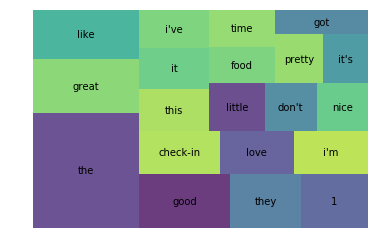

In [49]:
def count(docs):

        word_counts = Counter()
        appears_in = Counter()
        
        total_docs = len(docs)

        for doc in docs:
            word_counts.update(doc)
            appears_in.update(set(doc))

        temp = zip(word_counts.keys(), word_counts.values())
        
        wc = pd.DataFrame(temp, columns = ['word', 'count'])

        wc['rank'] = wc['count'].rank(method='first', ascending=False)
        total = wc['count'].sum()

        wc['pct_total'] = wc['count'].apply(lambda x: x / total)
        
        wc = wc.sort_values(by='rank')
        wc['cul_pct_total'] = wc['pct_total'].cumsum()

        t2 = zip(appears_in.keys(), appears_in.values())
        ac = pd.DataFrame(t2, columns=['word', 'appears_in'])
        wc = ac.merge(wc, on='word')

        wc['appears_in_pct'] = wc['appears_in'].apply(lambda x: x / total_docs)
        
        return wc.sort_values(by='rank')

wc = count(shops['tokens'])
wc_top20 = wc[wc['rank'] <= 20]

squarify.plot(sizes=wc_top20['pct_total'], label=wc_top20['word'], alpha=.8 )
plt.axis('off')
plt.show()

In [50]:
# extract pronouns 
def get_lemmas(text):

    lemmas = []
    
    doc = nlp(text)
    
    # Something goes here :P
    for token in doc:
        if ((token.is_stop == False) and (token.is_punct == False)) and (token.pos_!= 'PRON') and (token not in STOP_WORDS):#exclude pronounds
            lemmas.append(token.lemma_)
    
    return lemmas
shops['lemmas'] = shops['full_review_text'].apply(get_lemmas)

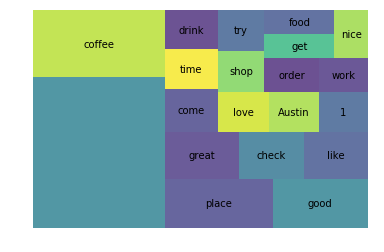

In [51]:
wc = count(shops['lemmas'])
wc_top20 = wc[wc['rank'] <= 20]

squarify.plot(sizes=wc_top20['pct_total'], label=wc_top20['word'], alpha=.8 )
plt.axis('off')
plt.show()

In [52]:
shops.head(2)

,coffee_shop_name,full_review_text,star_rating,tokens,lemmas,lemmastr
0,The Factory - Cafe With a Soul,11/25/2016 1 check-in Love love loved the atm...,5.0 star rating,"[11/25/2016, 1, check-in, love, love, loved, a...","[ , 11/25/2016, 1, check, Love, love, love, at...",11/25/2016 1 check love love love atmosphere...
1,The Factory - Cafe With a Soul,"12/2/2016 Listed in Date Night: Austin, Ambia...",4.0 star rating,"[12/2/2016, listed, date, night:, austin,, amb...","[ , 12/2/2016, list, Date, Night, Austin, Ambi...",12/2/2016 list date night austin ambiance au...


In [53]:
shops['lemmas'] = [[word.lower() for word in text] for text in shops['lemmas']]

In [54]:
shops['lemmastr'] = shops['lemmas'].str.join(' ')
shops.head(2)

,coffee_shop_name,full_review_text,star_rating,tokens,lemmas,lemmastr
0,The Factory - Cafe With a Soul,11/25/2016 1 check-in Love love loved the atm...,5.0 star rating,"[11/25/2016, 1, check-in, love, love, loved, a...","[ , 11/25/2016, 1, check, love, love, love, at...",11/25/2016 1 check love love love atmosphere...
1,The Factory - Cafe With a Soul,"12/2/2016 Listed in Date Night: Austin, Ambia...",4.0 star rating,"[12/2/2016, listed, date, night:, austin,, amb...","[ , 12/2/2016, list, date, night, austin, ambi...",12/2/2016 list date night austin ambiance au...


In [55]:
shops['lemmastr'].values

array(['  11/25/2016 1 check love love love atmosphere corner coffee shop style swing order matcha latte muy fantastico order get drink pretty streamlined order ipad include beverage selection range coffee wine desire level sweetness checkout system get latte minute   hope typical heart feather latte find list possibility art idea',
       '  12/2/2016 list date night austin ambiance austin beautiful love ambiance instagram worthy   definitely $ $ $ prepared go to cost pretty penny waffle dessert decent rave   probably unique nice',
       '  11/30/2016 1 check list brunch spots love eclectic homey plush decor want swing drink coffee   categorize pricy coffee place worth   thanksgiving want brunch head search chicken waffle   ample parking private lot   ordering pads   pick seat item ready   patient coffee drink longer   cold brew coffee chicken waffle share pop+art   po+art strawberry light fluffy outside gooey sweet filling inside   chicken waffle standard expect different complex in

In [56]:
from sklearn.feature_extraction.text import CountVectorizer

data= shops['lemmastr'].values

vectorizer = CountVectorizer(stop_words='english')

# tokenize and build vocab
vectorizer.fit_transform(data)


# Create a Vocabulary
# The vocabulary establishes all of the possible words that we might use.
vectorizer.vocabulary_

# The vocabulary dictionary does not represent the counts of words!!
dtm = vectorizer.transform(data)
dtm.todense() 

matrix([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [57]:
dtm = pd.DataFrame(dtm.todense(), columns = vectorizer.get_feature_names())

In [58]:
dtm.head()

,00,000,007,00am,00pm,02,03,04,04am,05,...,とマシュポテトサラダ付き,アイスモカも美味しいでーす,オースティンでも日本スタイルcafé,サラダ,セットはライスかトースト,チキンカツ,唐揚げなど色々,日本の味が恋しい時はsaーten,本立てコーナーには日本雑誌やマンガ自由読み用ありまーす,照り焼きボウル
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [59]:
dtmcount = pd.DataFrame(dtm.sum(axis = 0, skipna = True))
dtmcount

,0
00,66
000,6
007,8
00am,3
00pm,1
02,2
03,1
04,4
04am,1
05,5


In [60]:
dtmsort = dtmcount.sort_values(by = 0, ascending = False)
dh = dtmsort.head(50)

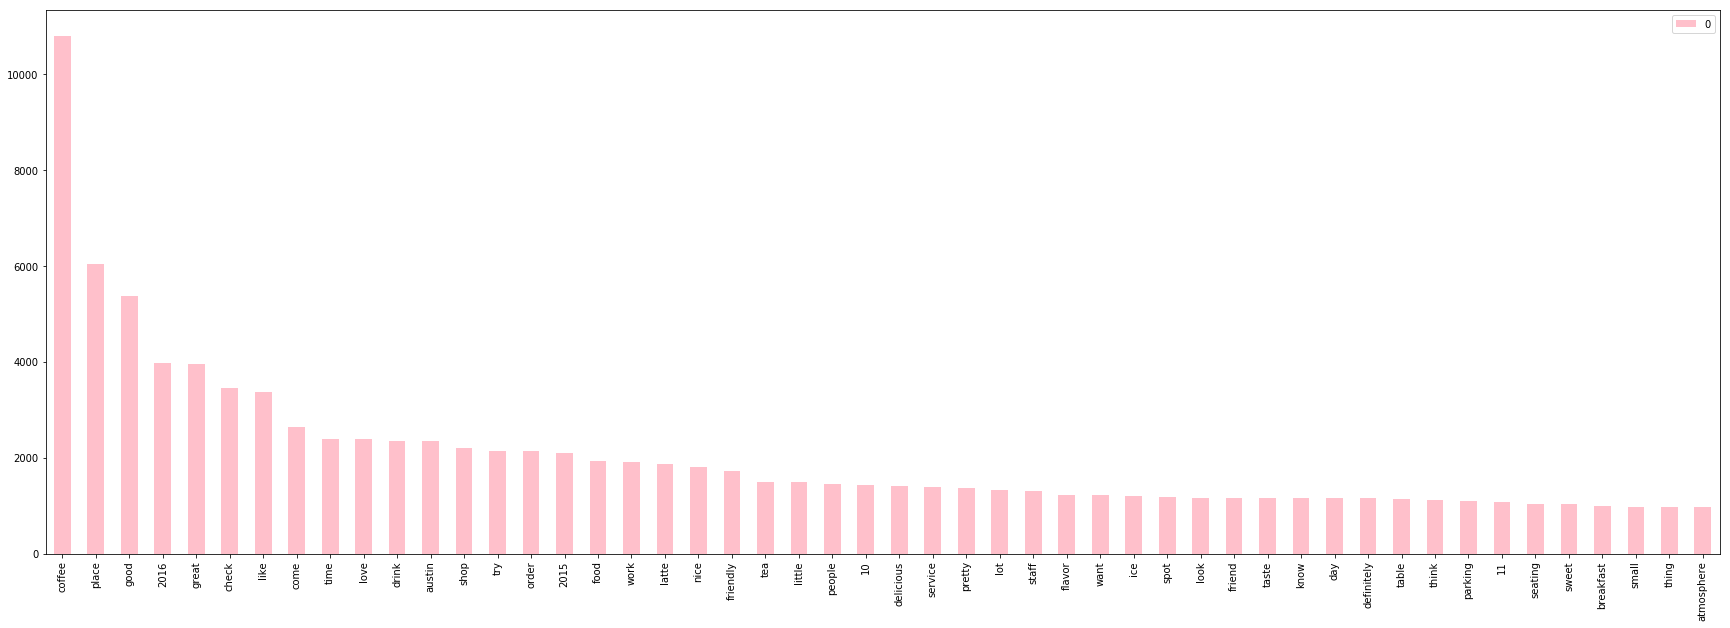

In [61]:
dh.plot.bar(figsize = (30,10), color = 'pink')

In [62]:
import scattertext as st
import spacy
from pprint import pprint

# convention_df = st.SampleCorpora.ConventionData2012.get_data()  
# convention_df.iloc[0]
nlp = spacy.load("en_core_web_md")
corpus = st.CorpusFromPandas(shops, 
                             category_col='star_rating', 
                             text_col='full_review_text',
                             nlp=nlp).build()

In [63]:
pprint(list(corpus.get_scaled_f_scores_vs_background().index[:10]))

['latte',
 'gelato',
 'baristas',
 'iced',
 'barista',
 'tacos',
 'pastries',
 'lattes',
 'chai',
 'mocha']


In [64]:
term_freq_df = corpus.get_term_freq_df()
term_freq_df['highratingscore'] = corpus.get_scaled_f_scores(' 5.0 star rating ')
pprint(list(term_freq_df.sort_values(by='highratingscore', ascending=False).index[:10]))

['love this',
 'amazing',
 'the best',
 'fantastic',
 'best',
 'awesome',
 'highly',
 'moon',
 'wonderful',
 'gelato']


In [65]:
term_freq_df.head(5)

,5.0 star rating freq,4.0 star rating freq,2.0 star rating freq,3.0 star rating freq,1.0 star rating freq,highratingscore
term,,,,,,
11/25/2016,14,2,4,0,0,0.597467
1,899,882,125,262,45,0.092341
check,1539,1313,136,333,36,0.887402
in,5251,3947,756,1220,430,0.884225
love,1251,483,49,136,23,0.965948


In [66]:
term_freq_df['poorratingscore'] = corpus.get_scaled_f_scores(' 1.0 star rating ')
pprint(list(term_freq_df.sort_values(by='poorratingscore', ascending=False).index[:10]))

['rude',
 'employee',
 'horrible',
 'worst',
 'the worst',
 'him',
 'will not',
 'a business',
 'deaf',
 'manager']


In [72]:
term_freq_df.sort_values(by= 'poorratingscore', ascending = False)

,5.0 star rating freq,4.0 star rating freq,2.0 star rating freq,3.0 star rating freq,1.0 star rating freq,highratingscore,poorratingscore
term,,,,,,,
rude,4,15,37,21,61,0.032122,1.000000
employee,15,14,9,4,28,0.259038,0.996508
horrible,4,7,14,11,24,0.232227,0.996108
worst,7,15,14,8,28,0.205064,0.995342
the worst,6,8,10,7,21,0.275937,0.995118
him,48,32,22,9,63,0.104209,0.992040
will not,15,5,12,1,19,0.339384,0.988336
a business,13,5,1,7,15,0.380084,0.974564
deaf,3,0,0,0,13,0.423438,0.970807


In [68]:
html = st.produce_scattertext_explorer(corpus,
         category=' 1.0 star rating ',
         category_name='Poor Yelp Rating',
         not_category_name='High Yelp Rating',
         width_in_pixels=1000,
         metadata=shops['coffee_shop_name'])
open("Yelp-CoffeeShop-Visualization.html", 'wb').write(html.encode('utf-8'))

6798927